<a href="https://colab.research.google.com/github/shekabhi15/SOC_23/blob/main/Sign_Language_Recogizer/SignLanguageRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/drive/MyDrive/SOC:Sign Langauge/sign_data.csv")
df.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303,pixel2304,label
0,154,168,168,161,163,164,162,164,163,163,...,130,136,138,134,150,192,185,185,178,2
1,155,176,173,172,173,169,174,171,170,170,...,193,198,197,200,199,197,202,199,184,2
2,154,179,177,174,174,171,176,172,174,173,...,202,203,202,205,204,202,206,203,187,2
3,155,180,178,174,174,172,177,173,174,173,...,198,202,201,204,203,201,205,202,186,2
4,155,180,178,174,174,172,177,173,174,174,...,144,144,145,137,194,200,200,205,181,2
5,157,179,176,173,176,174,177,171,174,173,...,199,204,203,206,205,202,207,204,188,2
6,157,178,177,176,176,171,176,175,173,173,...,199,204,203,206,205,202,207,204,188,2
7,156,177,176,176,176,171,176,175,173,173,...,202,203,203,206,205,202,207,204,188,2
8,153,178,177,173,174,172,177,173,173,173,...,203,202,201,204,203,201,205,202,186,2
9,156,177,175,175,175,169,174,174,174,174,...,203,203,202,205,204,202,206,203,187,2


In [3]:
def split_train_test(csv_file, test_size=0.2, random_state=42):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Split into train and test sets
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)

    # Save train and test sets as separate CSV files
    train_df.to_csv('/content/drive/MyDrive/SOC:Sign Langauge/train.csv', index=False)
    test_df.to_csv('/content/drive/MyDrive/SOC:Sign Langauge/test.csv', index=False)

    print("Train and test CSV files saved successfully.")

# Provide the path to your input CSV file
csv_file_path = '/content/drive/MyDrive/SOC:Sign Langauge/sign_data.csv'

# Split the CSV file into train and test sets
split_train_test(csv_file_path)

Train and test CSV files saved successfully.


In [4]:

def load_data(path):
    df = pd.read_csv(path)
    y = np.array([label for label in df['label']])
    df = df.drop('label', axis=1)
    x = np.array([df.iloc[i].to_numpy().reshape((48,48))
                  for i in range(len(df))]).astype(float)
    x = np.expand_dims(x, axis=3)
    y = pd.get_dummies(y).values

    return x, y

X_train, Y_train = load_data('/content/drive/MyDrive/SOC:Sign Langauge/train.csv')
X_test, Y_test = load_data('/content/drive/MyDrive/SOC:Sign Langauge/test.csv')

In [5]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(64, 48, 48, 1) (64, 4)
(16, 48, 48, 1) (16, 4)


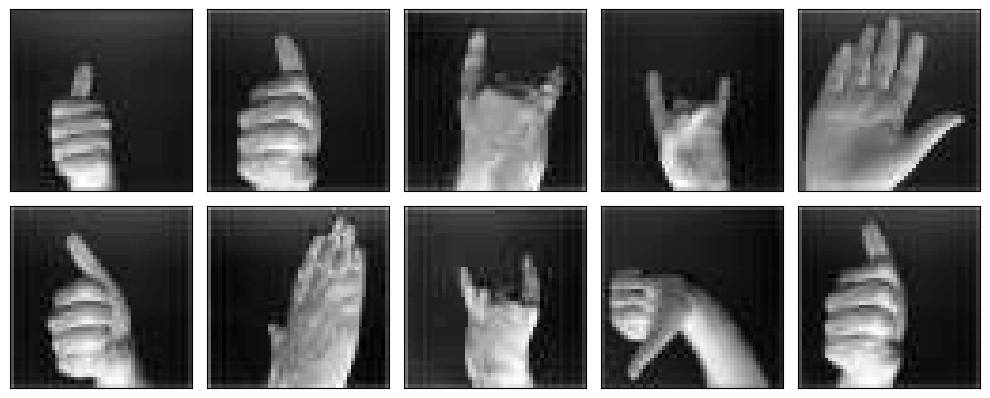

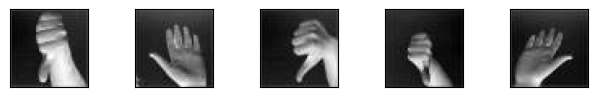

In [49]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].squeeze(), cmap=plt.cm.binary)
    # plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()

for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].squeeze(), cmap=plt.cm.binary)
    # plt.xlabel(class_names[np.argmax(Y_train, axis=1)[i]])
plt.tight_layout()
plt.show()

In [43]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(filters=16,
						kernel_size=(3, 3),
						activation='relu',
						input_shape=(48,48, 1)),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Conv2D(filters=32,
						kernel_size=(3, 3),
						activation='relu'),
	tf.keras.layers.MaxPooling2D(2, 2),

	tf.keras.layers.Flatten(),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dropout(0.5),
	tf.keras.layers.BatchNormalization(),
	tf.keras.layers.Dense(4, activation='softmax')
])


In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 batch_normalization_10 (Bat  (None, 3200)            

In [45]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# model.compile(
#     optimizer='adam',
#     loss='mse',
#     metrics=['mae'])

In [46]:
history = model.fit(X_train,Y_train,
                    validation_data=(X_test,Y_test),
                    epochs=20,
                    verbose=1)

Epoch 1/20
2/2 [==============================] - 3s 476ms/step - loss: 1.9464 - accuracy: 0.3750 - val_loss: 56.1297 - val_accuracy: 0.3125
Epoch 2/20
2/2 [==============================] - 0s 149ms/step - loss: 0.8274 - accuracy: 0.6562 - val_loss: 54.3036 - val_accuracy: 0.3125
Epoch 3/20
2/2 [==============================] - 0s 149ms/step - loss: 0.6427 - accuracy: 0.7656 - val_loss: 40.4958 - val_accuracy: 0.3750
Epoch 4/20
2/2 [==============================] - 0s 162ms/step - loss: 0.6544 - accuracy: 0.6406 - val_loss: 34.5967 - val_accuracy: 0.1250
Epoch 5/20
2/2 [==============================] - 0s 126ms/step - loss: 0.4052 - accuracy: 0.8594 - val_loss: 36.9659 - val_accuracy: 0.1250
Epoch 6/20
2/2 [==============================] - 0s 157ms/step - loss: 0.2429 - accuracy: 0.9531 - val_loss: 38.4991 - val_accuracy: 0.1250
Epoch 7/20
2/2 [==============================] - 0s 155ms/step - loss: 0.2188 - accuracy: 0.9375 - val_loss: 37.9851 - val_accuracy: 0.1250
Epoch 8/20
2/

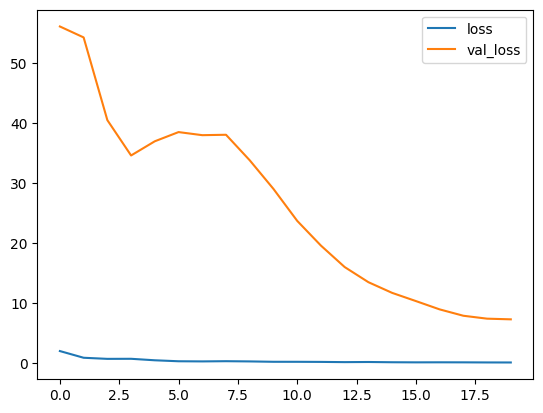

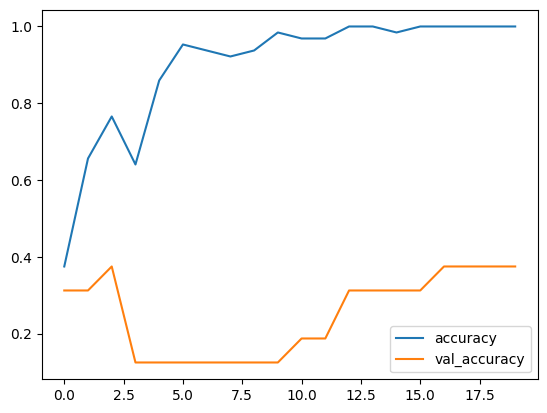

In [47]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
history_df.loc[:,['accuracy','val_accuracy']].plot()
plt.show()

In [48]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 59ms/step - loss: 7.2411 - accuracy: 0.3750


[7.241076469421387, 0.375]